In [25]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import date manipulation
import datetime as dt
from datetime import date, timedelta

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning
from sklearn.linear_model import LinearRegression
import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics

# import helpers
import re


kernels = pd.read_csv('../input/Kernels.csv', parse_dates=True)
kernel_lang = pd.read_csv('../input/KernelLanguages.csv')
kernel_tags = pd.read_csv('../input/KernelTags.csv')
kernel_votes = pd.read_csv('../input/KernelVotes.csv')
kernel_versions = pd.read_csv('../input/KernelVersions.csv')
kernel_competitions = pd.read_csv('../input/KernelVersionCompetitionSources.csv')
kernel_users = pd.read_csv('../input/Users.csv')
datasets = pd.read_csv('../input/Datasets.csv')
kernel_datasets = pd.read_csv('../input/KernelVersionDatasetSources.csv')
dataset_versions = pd.read_csv('../input/DatasetVersions.csv')
tags = pd.read_csv('../input/Tags.csv')
competitions = pd.read_csv('../input/Competitions.csv')
messages = pd.read_csv('../input/ForumMessages.csv')

In [3]:
total_kernels = len(kernels['Id'].unique())
print('Total number of kernels: {total_kernels}'.format(total_kernels = total_kernels))

total_public = len(kernels[pd.notnull(kernels['MadePublicDate'])])
print('Total number of public kernels: {total_public_kernels}'.format(total_public_kernels = total_public))

total_upvoted = len(kernels[ kernels['TotalVotes'] > 0])
print('Total number of kernels with upvotes: {total_upvoted}'.format(total_upvoted = total_upvoted))

total_awarded = len(kernels[np.isfinite(kernels['Medal'])])
print('Total number of kernels with any medal: {total_awarded}'.format(total_awarded = total_awarded))

print('Total number of public kernels with no upvotes: {total_no_upvotes}'.format(total_no_upvotes = total_no_upvotes))

total_private = total_kernels - total_public
print('Total number of private kernels: {total_private}'.format(total_private = total_private))

total_upvoted_not_awarded = total_upvoted - total_awarded
print('Total number of upvoted, but not awarded: {total_upvoted_not_awarded}'.format(total_upvoted_not_awarded = total_upvoted_not_awarded))

Total number of kernels: 240554
Total number of public kernels: 225962
Total number of kernels with upvotes: 53086
Total number of kernels with any medal: 10351
Total number of public kernels with no upvotes: 172876
Total number of private kernels: 14592
Total number of upvoted, but not awarded: 42735


In [28]:
kernels['CreationDate'] = pd.to_datetime(kernels['CreationDate'])

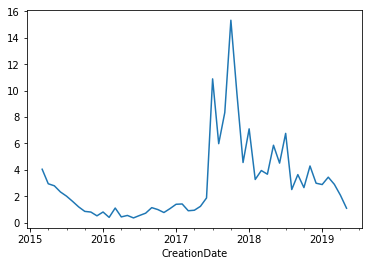

In [33]:
kernels_dt = kernels.set_index(kernels['CreationDate'])

kernels_dt.TotalVotes.resample("M").mean().plot()

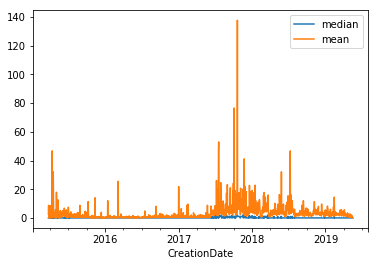

In [54]:
kernels_dt.TotalVotes.resample("D").agg(['median','mean']).plot()

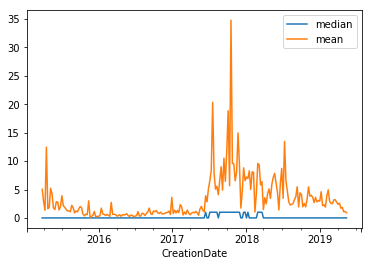

In [55]:
kernels_dt.TotalVotes.resample("W").agg(['median','mean']).plot()

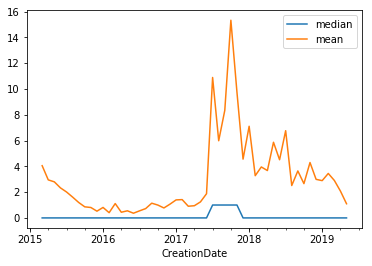

In [56]:
kernels_dt.TotalVotes.resample("M").agg(['median','mean']).plot()

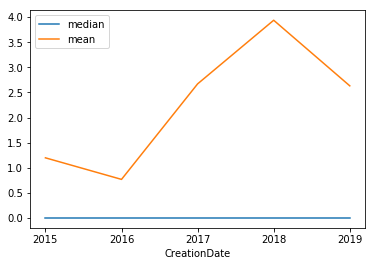

In [57]:
kernels_dt.TotalVotes.resample("Y").agg(['median','mean']).plot()

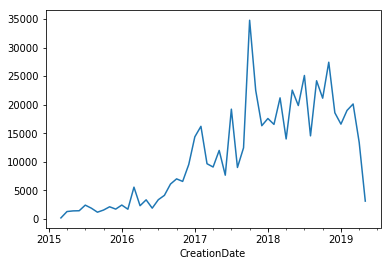

In [59]:
kernels_dt.TotalVotes.resample("M").sum().plot()